In [1]:
import json
from pymongo import MongoClient
import pandas as pd
import csv

In [2]:
client = MongoClient('localhost',27017)

## create db

In [5]:
db=client.sample

In [6]:
# creating collection
Coll = db["Tweets"]

In [6]:
from bson.json_util import loads
    
with open('fetched_tweets.json','r') as file:
    data = [json.loads(f) for f in file] 

In [7]:
Coll.insert(data)

C:\Users\NITISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('619a5df8346ff6a5891c4724'),
 ObjectId('619a5df8346ff6a5891c4725'),
 ObjectId('619a5df8346ff6a5891c4726'),
 ObjectId('619a5df8346ff6a5891c4727'),
 ObjectId('619a5df8346ff6a5891c4728'),
 ObjectId('619a5df8346ff6a5891c4729'),
 ObjectId('619a5df8346ff6a5891c472a'),
 ObjectId('619a5df8346ff6a5891c472b'),
 ObjectId('619a5df8346ff6a5891c472c'),
 ObjectId('619a5df8346ff6a5891c472d'),
 ObjectId('619a5df8346ff6a5891c472e'),
 ObjectId('619a5df8346ff6a5891c472f'),
 ObjectId('619a5df8346ff6a5891c4730'),
 ObjectId('619a5df8346ff6a5891c4731'),
 ObjectId('619a5df8346ff6a5891c4732'),
 ObjectId('619a5df8346ff6a5891c4733'),
 ObjectId('619a5df8346ff6a5891c4734'),
 ObjectId('619a5df8346ff6a5891c4735'),
 ObjectId('619a5df8346ff6a5891c4736'),
 ObjectId('619a5df8346ff6a5891c4737'),
 ObjectId('619a5df8346ff6a5891c4738'),
 ObjectId('619a5df8346ff6a5891c4739'),
 ObjectId('619a5df8346ff6a5891c473a'),
 ObjectId('619a5df8346ff6a5891c473b'),
 ObjectId('619a5df8346ff6a5891c473c'),
 ObjectId('619a5df8346ff6

### Creating dataframe 

In [7]:
rec=Coll.aggregate([ 
    { '$project': {'created_at':1,'text':1,'lang':1,'place':1}}
])

In [8]:
res=list(rec)

In [9]:
print(type(Coll))
res[0]

<class 'pymongo.collection.Collection'>


{'_id': ObjectId('619a5df8346ff6a5891c4724'),
 'created_at': 'Sun Nov 21 10:22:30 +0000 2021',
 'text': 'RT @BartDeMeulenaer: Laten de 5 vragen van Tony Benn (google het maar) stellen a/d virocraten.\n(Voordat links schuimbekt; hij was van Labou…',
 'place': None,
 'lang': 'nl'}

In [10]:
from pandas.io.json import json_normalize
df=json_normalize(rec)
df.head()

""


In [11]:
df1=pd.DataFrame(res)

In [12]:
df1.head()

,_id,created_at,text,place,lang
0,619a5df8346ff6a5891c4724,Sun Nov 21 10:22:30 +0000 2021,RT @BartDeMeulenaer: Laten de 5 vragen van Ton...,None,nl
1,619a5df8346ff6a5891c4725,Sun Nov 21 10:22:30 +0000 2021,@boi_samirah @AntifaRepresent @ItsKingsBruh I ...,None,en
2,619a5df8346ff6a5891c4726,Sun Nov 21 10:22:30 +0000 2021,This the best project everyone is waiting for....,None,en
3,619a5df8346ff6a5891c4727,Sun Nov 21 10:22:30 +0000 2021,RT @forkimsunoossi: EN-CONNECT COMPANION: JAPA...,None,en
4,619a5df8346ff6a5891c4728,Sun Nov 21 07:58:40 +0000 2021,RT @sornorjud: ℊ𝒾𝓋ℯ 𝒶𝓌𝒶𝓎 𝓅𝓇ℴ𝒸𝓇ℯ𝒶𝓉ℯ 𝒷𝓇𝓊𝓈𝒽\n𝓅𝓁𝓈 ...,None,en


In [13]:
import json
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
rec=Coll.aggregate([ 
    { '$project': {'created_at':1,'text':1,'lang':1,'place':1}}
])

In [20]:
len(Coll.distinct("user.id"))

41

In [49]:
user_status_count=Coll.aggregate([ 
    { '$group': {'_id':'$user.screen_name','StatusesCount':{'$sum':'$user.statuses_count'}}}
])
usc_list=list(user_status_count)
usc=pd.DataFrame.from_dict(usc_list)
usc.rename(columns={'_id': 'Screen_Name', 'StatusesCount': 'Statuses_Count'}, inplace=True)
usc = usc.sort_values('Statuses_Count',ascending=False)

In [50]:
usc.head(41)

,Screen_Name,Statuses_Count
21,Osama_otero,186290
11,pegeert,57151
31,mrsk_ing,33268
10,oblivixci,32964
34,tri7Qimura,26105
22,AlvesTF,25677
0,disayanghost,22993
14,mintumeshu,22171
8,ufecityx,17137
26,ricarduscaseus,16305


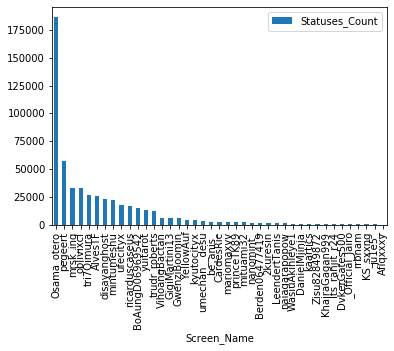

In [48]:
usc.plot(x ='Screen_Name', y='Statuses_Count', kind = 'bar')

<BarContainer object of 5 artists>

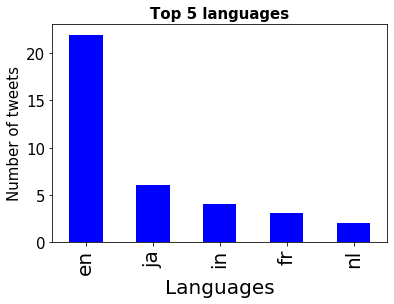

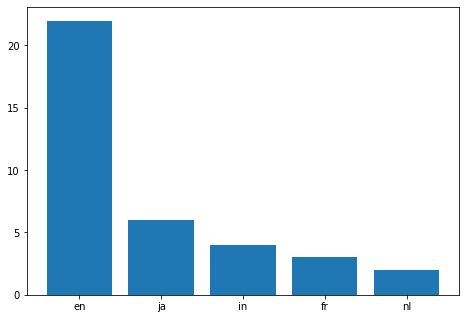

In [105]:
tweets_by_country = df1['lang'].value_counts()

#displaying tweets graphically
tweets_by_country = df1['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Languages', fontsize=20)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

countryList = list(df1['lang'])
countries = []
for val in countryList:
    if val != None:
        countries.append(val)
counter=collections.Counter(countries)
valueList = list(counter.values())
valueList.sort(reverse=True)
keyList = list(tweets_by_country.index)
valueTop = valueList[:5]
keyTop = keyList[:5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keyTop,valueTop)
#plt.show()
#print(tweets_by_country)

In [ ]:
keyList=list(usc['Screen_Name'])
valueList=list(usc['Statuses_Count'])
valueTop = valueList[:5]
keyTop = keyList[:5]
#plt.figure(figsize=(10,10))
plt.bar(keyTop,valueTop , color='blue')
plt.xlabel('Screen Name', fontsize=20)
plt.ylabel('Statuses Count' , fontsize=15)
plt.title('Top 5 Statuses Count', fontsize=15, fontweight='bold')
plt.ticklabel_format(axis="y", style="plain")

In [71]:
url_rec=Coll.aggregate([ 
    { '$project': {'entities':1}}
])

In [72]:
url_resc=list(url_rec)

In [73]:
url_resc[1]

{'_id': ObjectId('619a5df8346ff6a5891c4725'),
 'entities': {'hashtags': [],
  'urls': [{'url': 'https://t.co/bcN9Ibhp9J',
    'expanded_url': 'https://twitter.com/i/web/status/1462365799507714049',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}],
  'user_mentions': [{'screen_name': 'boi_samirah',
    'name': 'Boizzy',
    'id': 341251311,
    'id_str': '341251311',
    'indices': [0, 12]},
   {'screen_name': 'AntifaRepresent',
    'name': '☭',
    'id': 773065079235325953,
    'id_str': '773065079235325953',
    'indices': [13, 29]},
   {'screen_name': 'ItsKingsBruh',
    'name': 'Kings',
    'id': 1183952233777389568,
    'id_str': '1183952233777389568',
    'indices': [30, 43]}],
  'symbols': []}}

In [69]:
(url_res[0])

{'_id': ObjectId('619a5df8346ff6a5891c4724'),
 'id': 1462365799587454977,
 'entities': {'hashtags': [],
  'urls': [],
  'user_mentions': [{'screen_name': 'BartDeMeulenaer',
    'name': 'Bart De Meulenaer',
    'id': 426518737,
    'id_str': '426518737',
    'indices': [3, 19]}],
  'symbols': []}}

In [64]:
url=pd.DataFrame(url_res)

In [65]:
url.head()

,_id,entities
0,619a5df8346ff6a5891c4724,{'urls': []}
1,619a5df8346ff6a5891c4725,{'urls': [{'display_url': 'twitter.com/i/web/s...
2,619a5df8346ff6a5891c4726,{'urls': [{'display_url': 'twitter.com/i/web/s...
3,619a5df8346ff6a5891c4727,{'urls': []}
4,619a5df8346ff6a5891c4728,{'urls': [{'display_url': 'drive.google.com/fi...


In [129]:
user_name=Coll.aggregate([ 
    { '$project': {'user.id':1}}
])

user=list(user_name)
#print(len(user))
user_p=pd.DataFrame(user)
#user Screen Name
usn=pd.DataFrame()
usn['id']=user_p['_id']
usn['User_id']=list(map(lambda tweet : tweet['id'], user_p.user))
usn.head()

,id,User_id
0,619a5df8346ff6a5891c4724,3601138582
1,619a5df8346ff6a5891c4725,983049594786471936
2,619a5df8346ff6a5891c4726,1411049001940668420
3,619a5df8346ff6a5891c4727,1054283724
4,619a5df8346ff6a5891c4728,1381123189225316352


In [130]:
usn.User_id.nunique()

41

In [119]:
user_p.head()#[screen_name]

,_id,user
0,619a5df8346ff6a5891c4724,"{'screen_name': 'pegeert', 'protected': False}"
1,619a5df8346ff6a5891c4725,"{'screen_name': 'GwenziBoomin', 'protected': F..."
2,619a5df8346ff6a5891c4726,"{'screen_name': 'WasiuAkinleye1', 'protected':..."
3,619a5df8346ff6a5891c4727,"{'screen_name': 'rrbnam', 'protected': False}"
4,619a5df8346ff6a5891c4728,"{'screen_name': 'KS_sxxng', 'protected': False}"


In [108]:
usn=pd.DataFrame()

usn['id']=user_p['_id']
usn['User_Screen_Name']=list(map(lambda tweet : str(tweet['screen_name']), user_p.user))

In [115]:
usn.User_Screen_Name.nunique()

41

In [133]:
user_name=Coll.aggregate([ 
    { '$project': {'user.location':1}}
])

user=list(user_name)
#print(len(user))
user_l=pd.DataFrame(user)

In [121]:
#user Screen Name
usn=pd.DataFrame()
usn['id']=user_p['_id']
usn['User_id']=list(map(lambda tweet : tweet['id'], user_p.user))
usn.head()

154


In [134]:
user_l

,_id,user
0,619a5df8346ff6a5891c4724,{'location': None}
1,619a5df8346ff6a5891c4725,"{'location': 'Los Noches, Hueco Mundo '}"
2,619a5df8346ff6a5891c4726,{'location': None}
3,619a5df8346ff6a5891c4727,"{'location': 'laspinas, Phillipines'}"
4,619a5df8346ff6a5891c4728,{'location': None}
5,619a5df8346ff6a5891c4729,"{'location': 'Franche-Comté, France'}"
6,619a5df8346ff6a5891c472a,"{'location': 'Dar es Salaam,Tanzania'}"
7,619a5df8346ff6a5891c472b,{'location': 'Thailand'}
8,619a5df8346ff6a5891c472c,"{'location': 'Nairobi, Kenya'}"
9,619a5df8346ff6a5891c472d,{'location': '91/ Strasbourg'}
